<a href="https://colab.research.google.com/github/animesh-kishore/cifar-10_cnn/blob/main/cifar_cnn_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Standard libraries

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Download dataset

In [4]:
transform = transforms.ToTensor()

train_data = datasets.CIFAR10(root='./', train=True, download=True, transform=transform)
test_data = datasets.CIFAR10(root='./', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
train_data

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
test_data

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./
    Split: Test
    StandardTransform
Transform: ToTensor()

# Create data loaders

In [8]:
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

# View data

Label: [2 1 7 1 4 6 1 1 9 4]
Class: ['bird' 'car' 'horse' 'car' 'deer' 'frog' 'car' 'car' 'truck' 'deer']


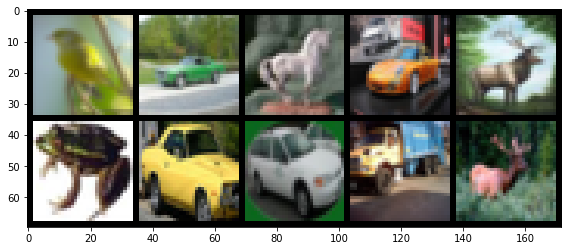

In [13]:
# define string for labels
class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', ' ship', 'truck']

# Grab first batch of 10 images
for images,labels in train_loader:
  break

# print labels
print('Label:', labels.numpy())
print('Class:', np.array([class_names[i] for i in labels]))

# print all images from the batch
im = make_grid(images, nrow=5) # Display 5 images in a row
plt.figure(figsize=(10, 4))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))

# Define and instantiate model

In [17]:
class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    # 1st CNN layer
    # Input 3 color channels, 6 filters, 3x3 kernel size, stride 1
    self.conv1 = nn.Conv2d(3, 6, 3, 1)
    # 2nd CNN layer
    # Input 6 channels from 6 filters of prev layer, 16 filters, 3x3 kernel size, stride 1
    self.conv2 = nn.Conv2d(6, 16, 3, 1)
    # 1st fully connected layer
    # Input 16 channels of 6 * 6 image from prev layer, output 120
    self.fc1 = nn.Linear(6 * 6 * 16, 120)
    # 2nd FC layer
    self.fc2 = nn.Linear(120, 84)
    # 3rd FC layer
    self.fc3 = nn.Linear(84, 10)

  def forward(self, X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X, 2, 2)
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X, 2, 2)

    # Flatten 16 channels/filter with 6x6 image
    X = X.view(-1, 6 * 6 * 16)

    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = F.log_softmax(self.fc3(X), dim = 1) # Use activation function softmax for final output due to categorial data

    return X

model = ConvolutionalNetwork()
criterion = nn.CrossEntropyLoss() # Loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model

In [18]:
import time

start_time = time.time()

epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
  trn_corr = 0
  tst_corr = 0

  # Run training batches
  for b, (X_train, y_train) in enumerate(train_loader):
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    # Tally number of correct predictions
    predicted = torch.max(y_pred.data, 1)[1]
    batch_corr = (predicted == y_train).sum()
    trn_corr += batch_corr

    # Update parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # print progress results per batch
    print(f'epoch:{i:2} batch:{b:4} loss:{loss.item():10.8f} accuracy:{(trn_corr.item() * 100) / (10 * (b + 1)):7.3f}%')

  # Log progress per epoch
  train_losses.append(loss)
  train_correct.append(trn_corr)

  with torch.no_grad():
    for b, (X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test) # Apply the model

      # Tally number of correct predictions
      predicted = torch.max(y_val.data, 1)[1]
      tst_corr += (predicted == y_test).sum()
  
  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)

print(f'\nDuration:{time.time() - start_time:.0f} secs')

Streaming output truncated to the last 5000 lines.
epoch: 9 batch:   2 loss:0.94995201 accuracy: 60.000%
epoch: 9 batch:   3 loss:1.15469241 accuracy: 57.500%
epoch: 9 batch:   4 loss:0.77602667 accuracy: 62.000%
epoch: 9 batch:   5 loss:0.62877864 accuracy: 65.000%
epoch: 9 batch:   6 loss:0.87600338 accuracy: 64.286%
epoch: 9 batch:   7 loss:0.46933347 accuracy: 67.500%
epoch: 9 batch:   8 loss:1.47859073 accuracy: 64.444%
epoch: 9 batch:   9 loss:1.08679461 accuracy: 63.000%
epoch: 9 batch:  10 loss:1.40425706 accuracy: 61.818%
epoch: 9 batch:  11 loss:1.18576860 accuracy: 60.833%
epoch: 9 batch:  12 loss:1.05613983 accuracy: 60.769%
epoch: 9 batch:  13 loss:0.49880910 accuracy: 62.143%
epoch: 9 batch:  14 loss:1.01014602 accuracy: 62.000%
epoch: 9 batch:  15 loss:0.58584082 accuracy: 63.750%
epoch: 9 batch:  16 loss:0.62789071 accuracy: 64.706%
epoch: 9 batch:  17 loss:1.15810072 accuracy: 64.444%
epoch: 9 batch:  18 loss:1.48355508 accuracy: 63.158%
epoch: 9 batch:  19 loss:0.6015

# Plot the loss

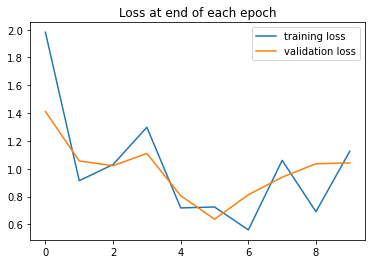

In [20]:
with torch.no_grad():
  plt.plot(train_losses, label='training loss')
  plt.plot(test_losses, label='validation loss')
  plt.title('Loss at end of each epoch')
  plt.legend()